In [66]:
import librosa
import librosa.display as disp
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

### Loading up all sample data for kick.

In [67]:
data = glob('audio/kick/*.wav')

## Plotting data

Taking `sample1` from data and converting it to a raw numpy array.

`y` is the time domain numpy array for the audio and `sr` is the samplerate. `trim()` gets rid of the redundant leading and trailing silences upto certain tolerence threshold (`35` here). Plotting `y` will give you an amplitude vs time graph of the audio.

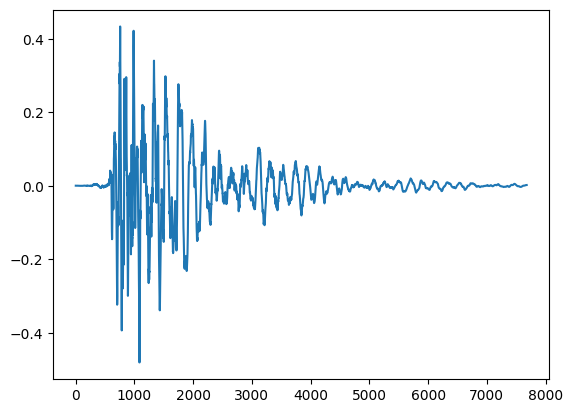

In [68]:
y, sr = librosa.load(data[0])
y,_ = librosa.effects.trim(y,top_db=35)

plt.plot(y)
plt.show()


## Getting frequencies

While amplitude determines how loud the sound is, an even more important parameter is frequency that describes the tone of the audio. Hence we use the `stft` - (short time fourier transform) function to get the frequency domain `D`. We also convert the signal to `db` instead of `amplitude` and get `abs` absolute values to get rid of negative amplitude (phase) which is a redundant parameter here. 

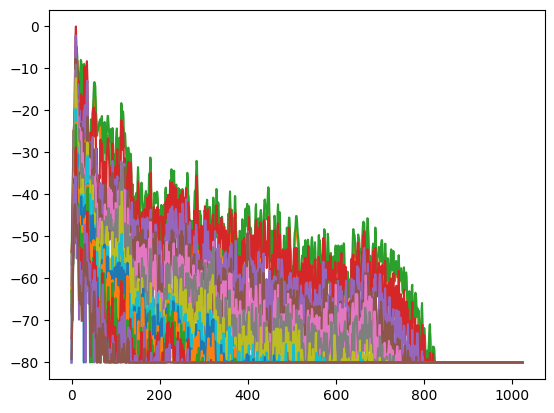

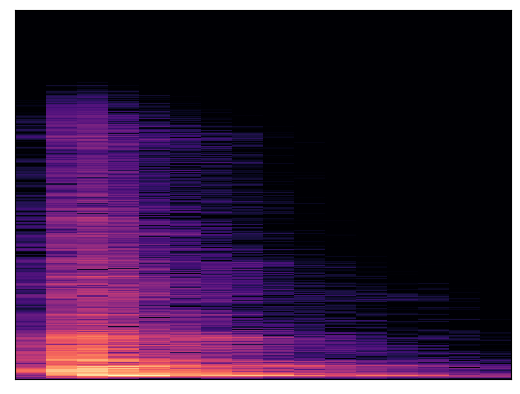

In [69]:
D = librosa.stft(y)
D = librosa.amplitude_to_db(np.abs(D),ref = np.max)

plt.plot(D)
plt.show()
img = disp.specshow(D)

## Mel Spectrogram

Another tool to convert the time domain `y` signal to frequency domain, however the `melspecrogram` function only returns the frequencies audible to humans getting rid of redundant frequencies for this particular project.

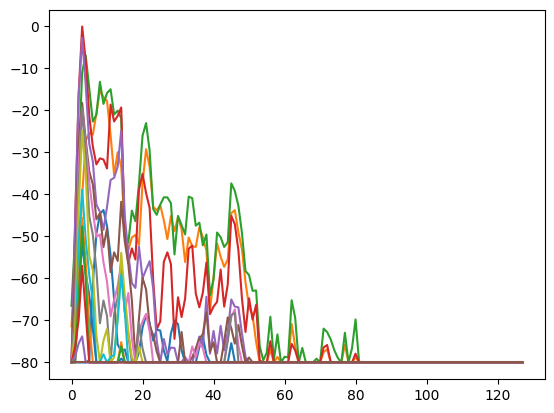

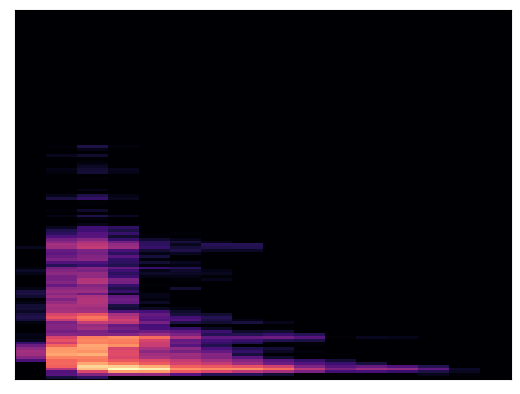

In [70]:
S = librosa.feature.melspectrogram(y=y,sr=sr,n_mels = 128)
S = librosa.amplitude_to_db(np.abs(S),ref = np.max)

plt.plot(S)
plt.show()
img = disp.specshow(S)

## Preparing data

Using `trim` and performing the above `melspectrogram` function on entire data set to prepare the data for the model.

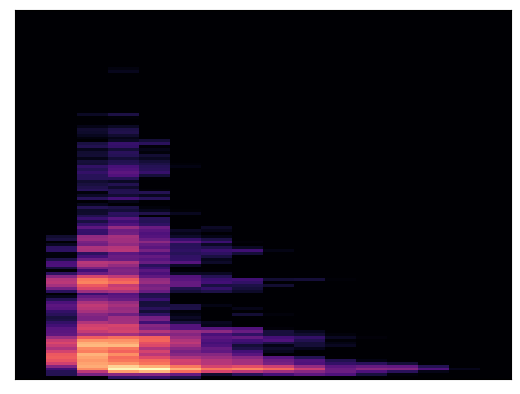

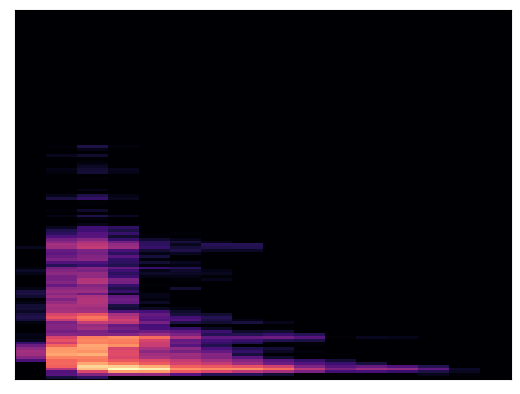

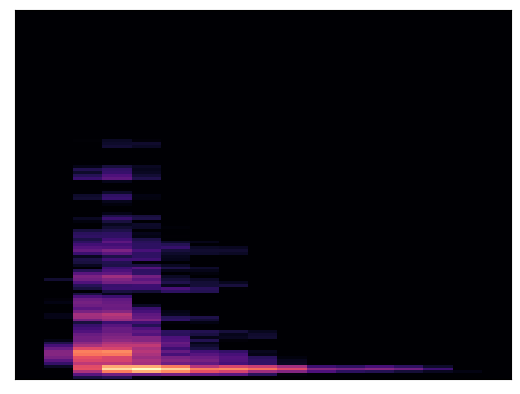

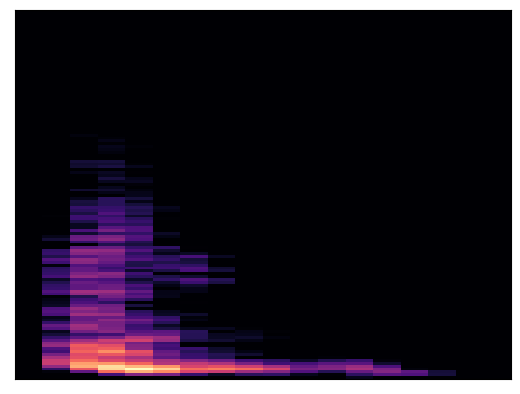

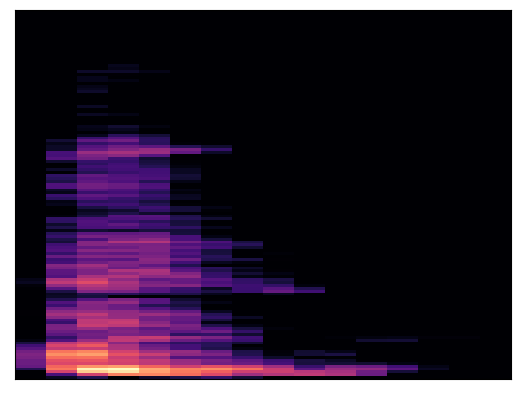

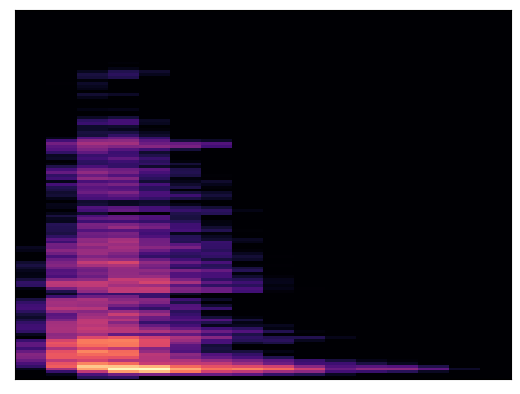

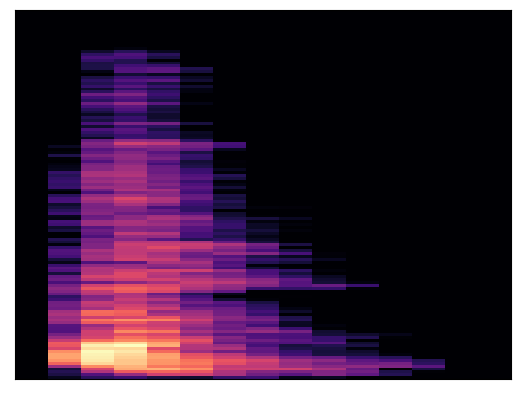

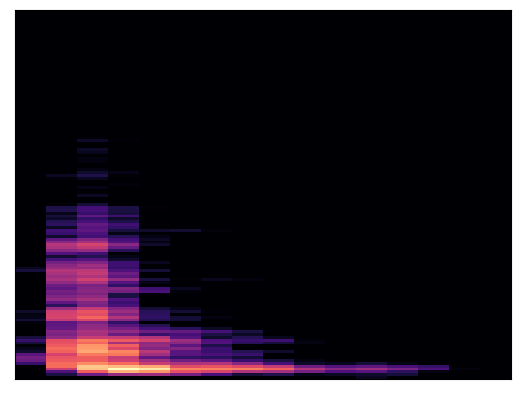

In [83]:
for file in data:
    y,sr = librosa.load(file)
    y,_ = librosa.effects.trim(y,top_db=35)
    
    S = librosa.feature.melspectrogram(y=y,sr=sr,n_mels = 128)
    S = librosa.amplitude_to_db(np.abs(S),ref = np.max)
    
    disp.specshow(S)
    #plt.plot(y)
    plt.show()
    
    